# PROBABILISTIC MOVEMENT PRIMITIVES - Reproduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

## Define basis functions

In [2]:
numofbasis=0
def BasisFunction(t):
    ph1 = np.zeros(numofbasis)
    totsum = 0
    for i in range(numofbasis):
        ph1[i] = np.exp(-width * (t/tau_motionduration - center[i]) ** 2)
        totsum = totsum + ph1[i]
    ph1 = ph1 / totsum

    ph2 = np.zeros(numofbasis)
    totsum = 0
    for j in range(numofbasis):
        ph2[j] = np.exp(-width * ((t + dt) / tau_motionduration - center[j]) ** 2)
        totsum = totsum + ph2[j]
    ph2 = ph2 / totsum
    
    ph2 = (ph2 - ph1)/dt

    pex = np.zeros((Dim, numofbasis*dim))
    for i in range(dim):
        pex[i, i*numofbasis:(i+1)*numofbasis] = ph1
    for i in range(dim):
        pex[dim+i, i * numofbasis:(i+1)*numofbasis] = ph2

    return pex

200


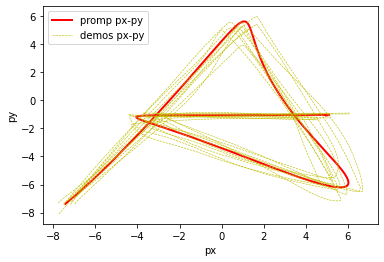

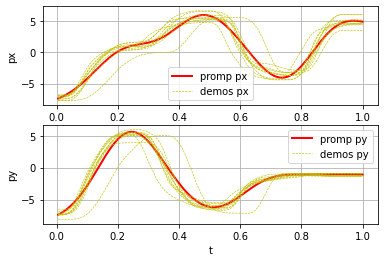

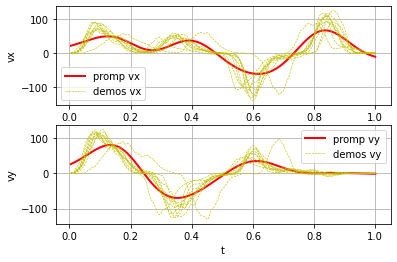

200


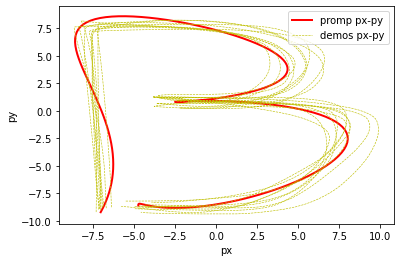

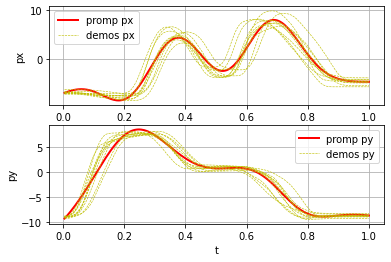

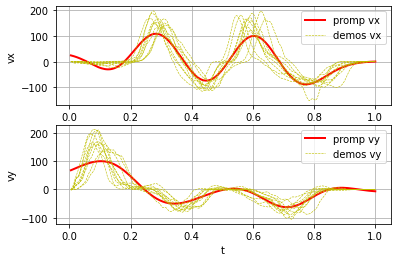

200


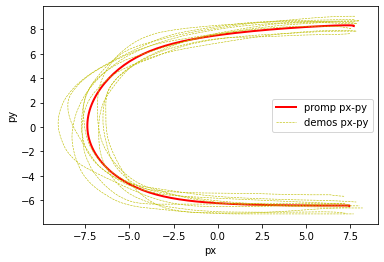

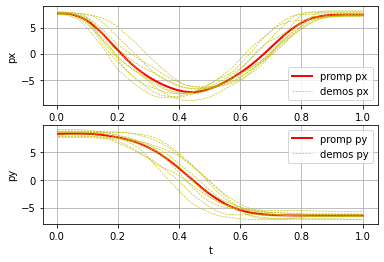

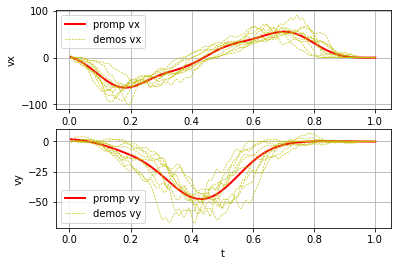

200


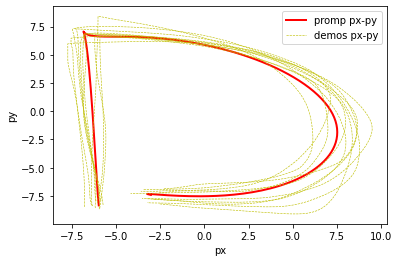

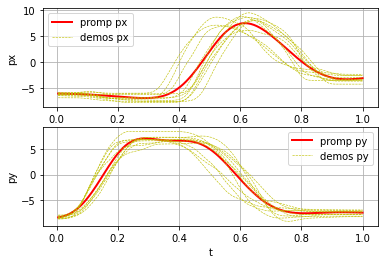

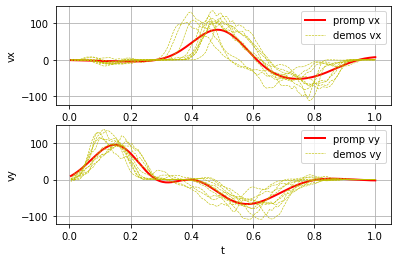

200


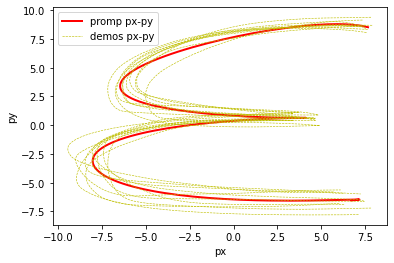

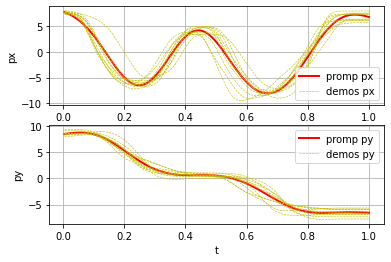

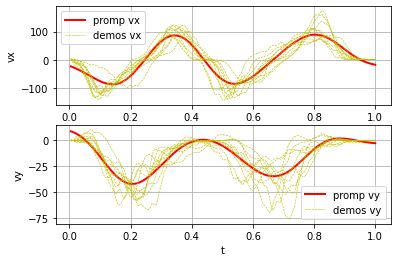

200


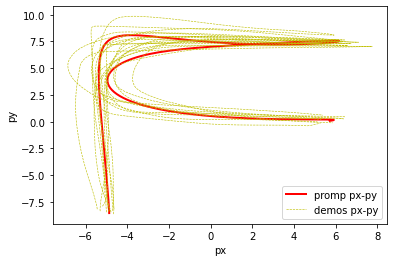

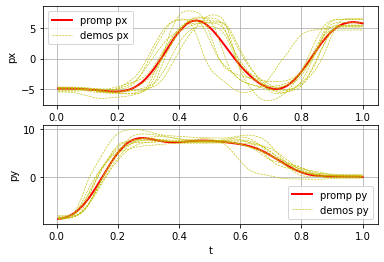

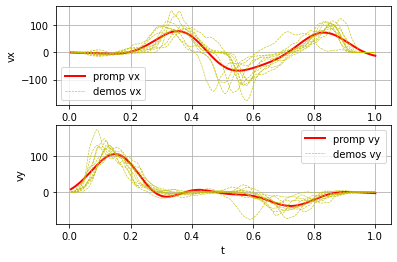

200


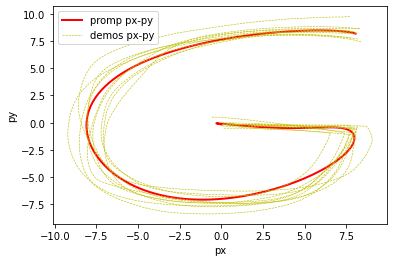

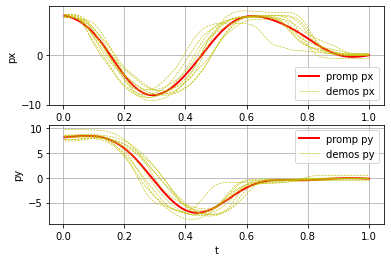

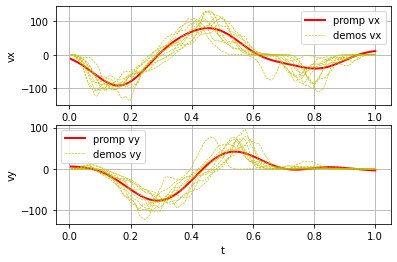

200


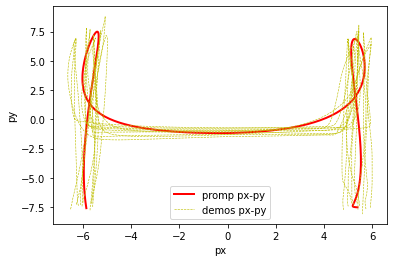

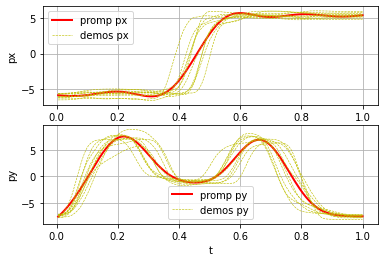

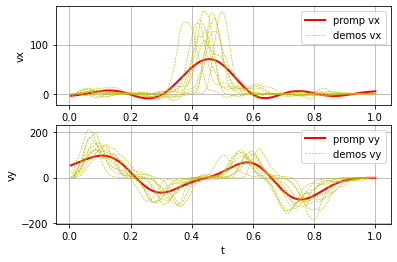

200


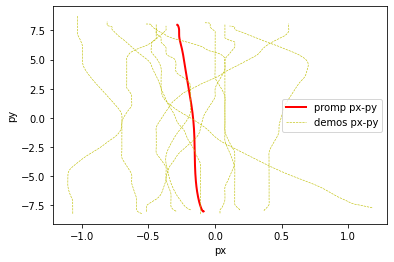

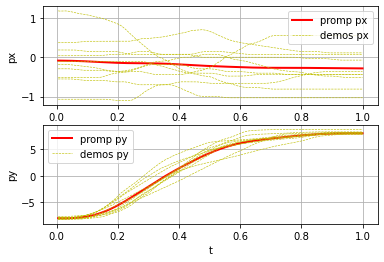

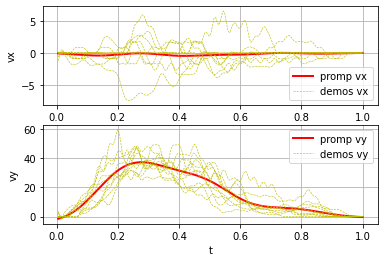

200


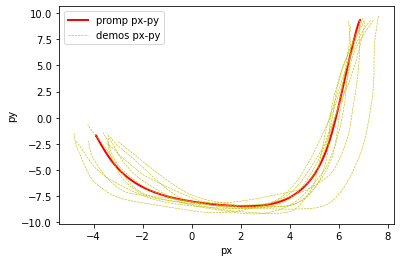

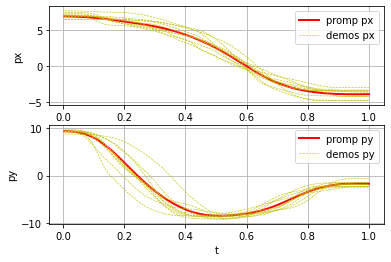

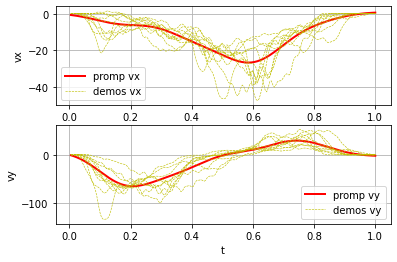

200


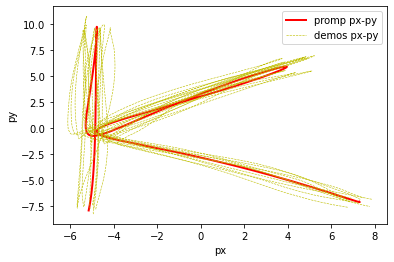

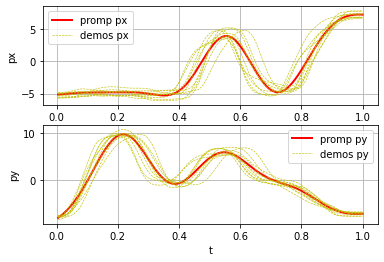

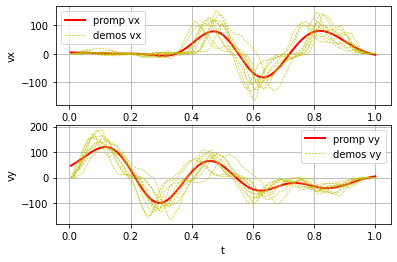

200


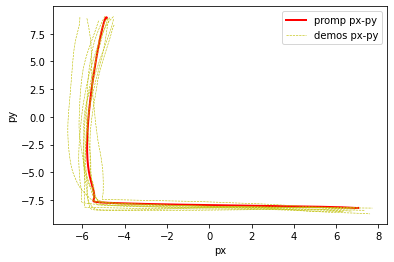

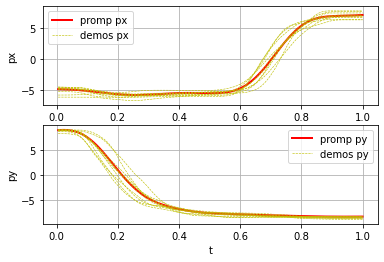

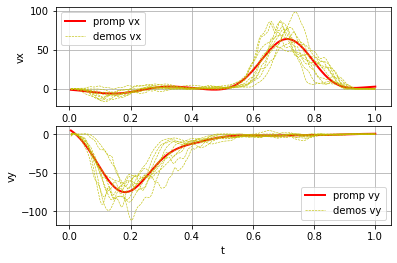

200


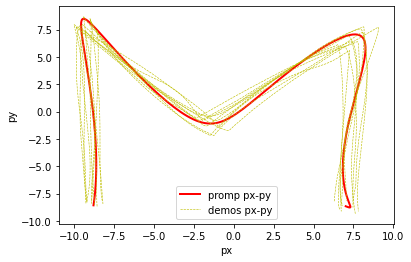

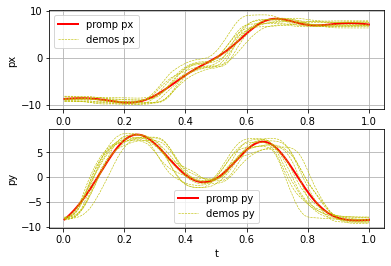

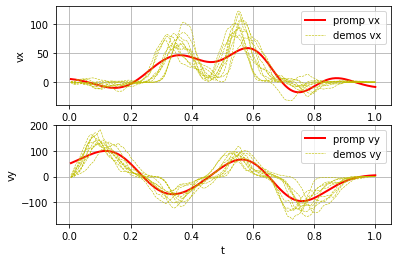

200


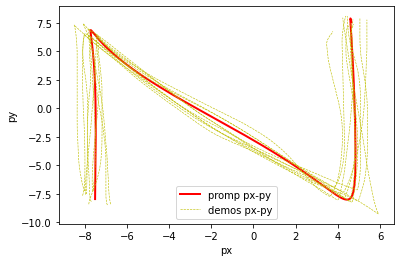

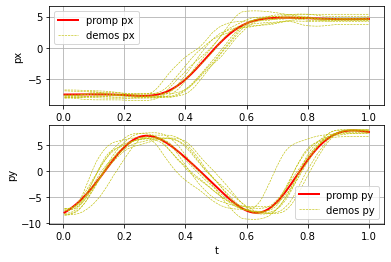

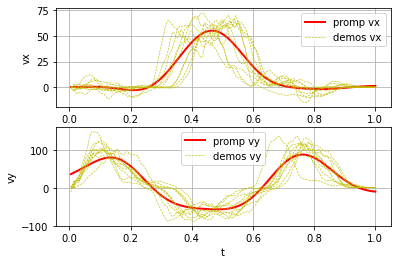

200


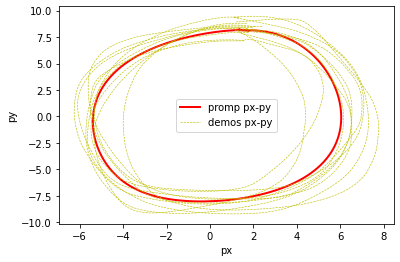

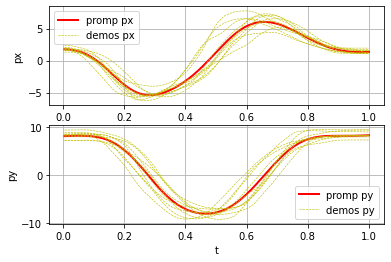

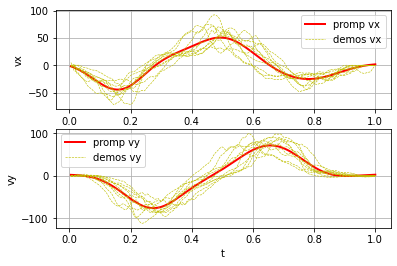

200


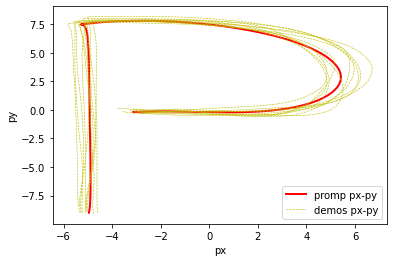

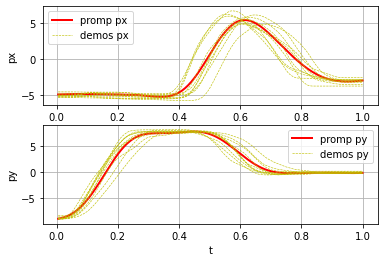

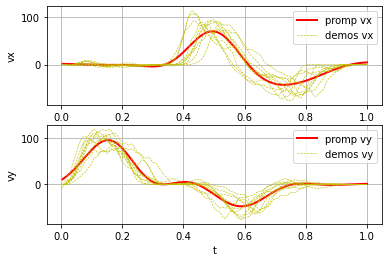

200


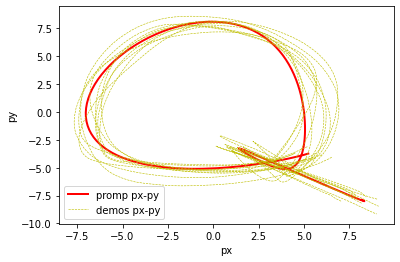

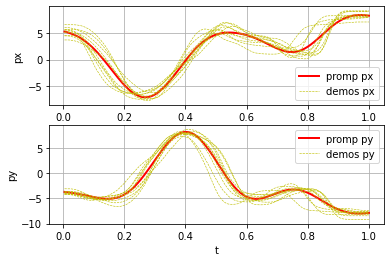

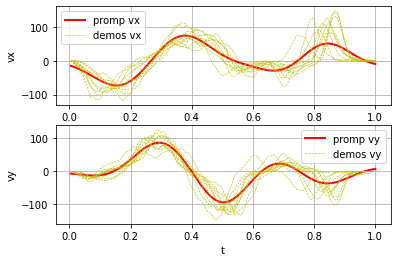

200


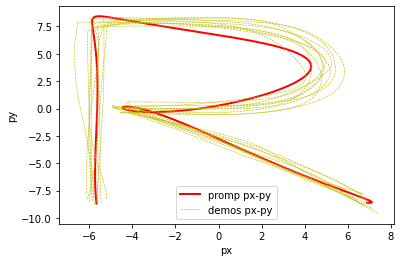

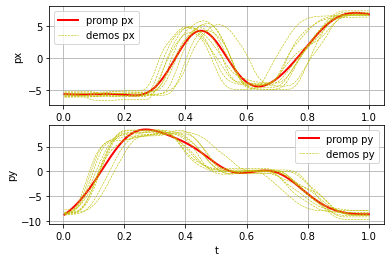

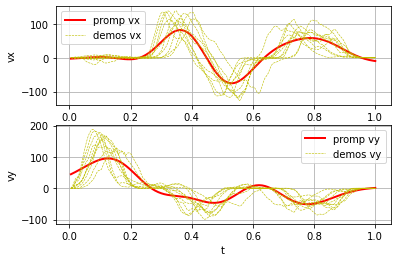

200


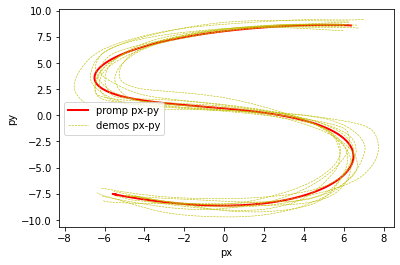

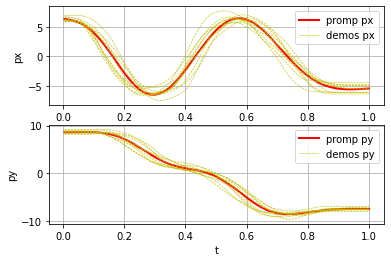

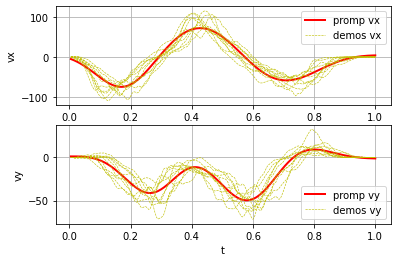

200


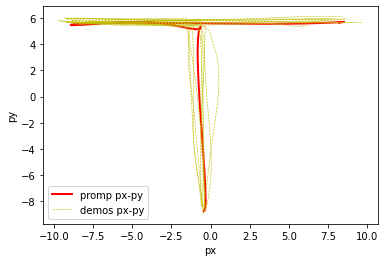

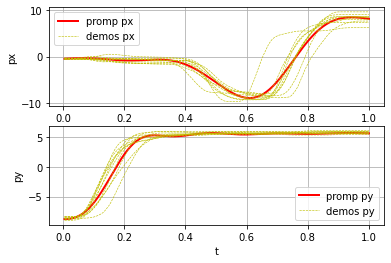

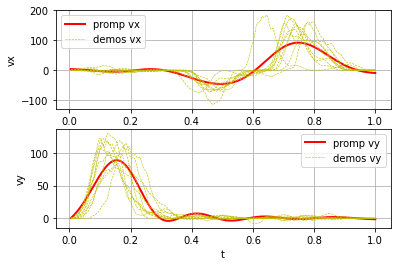

200


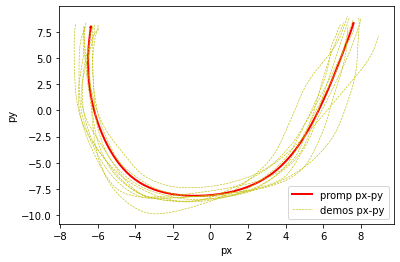

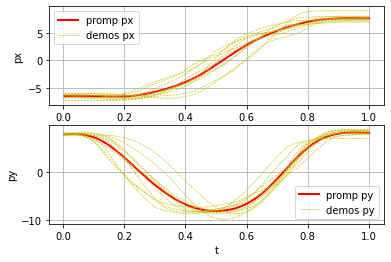

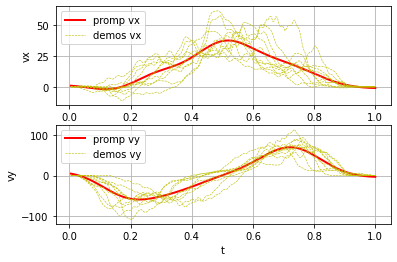

200


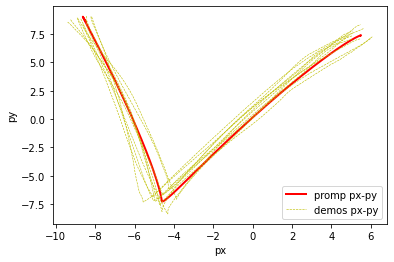

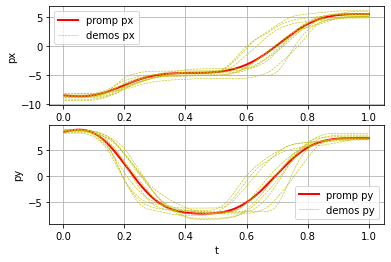

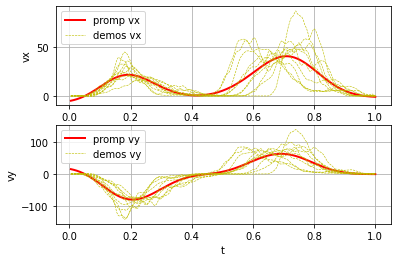

200


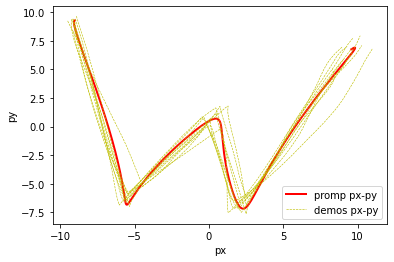

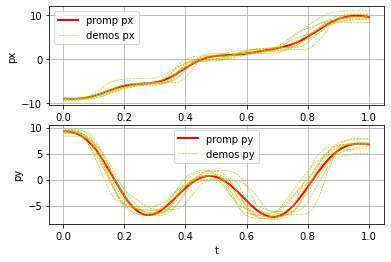

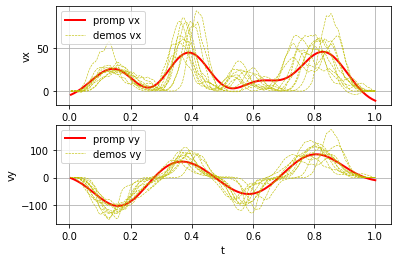

200


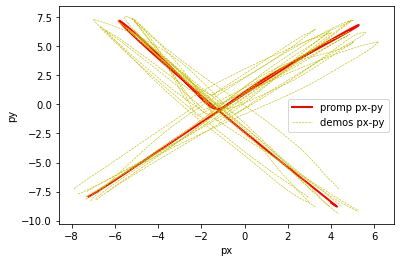

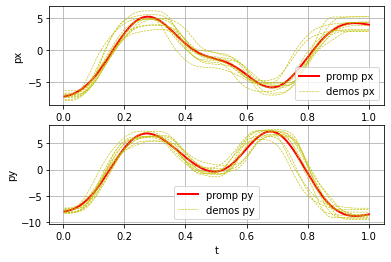

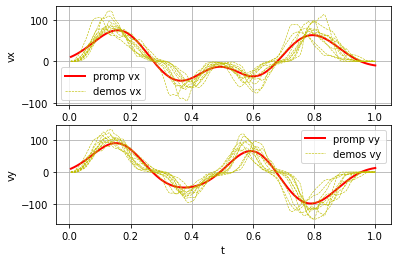

200


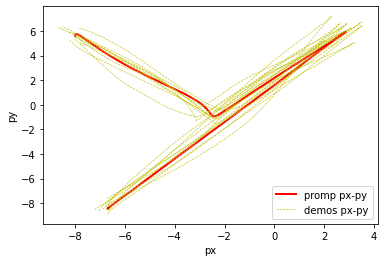

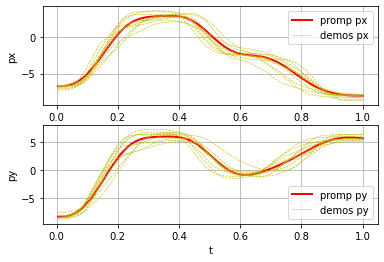

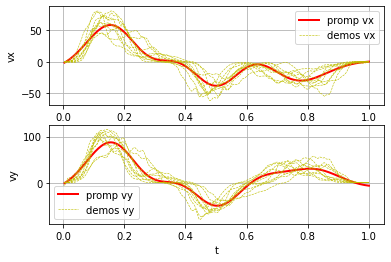

200


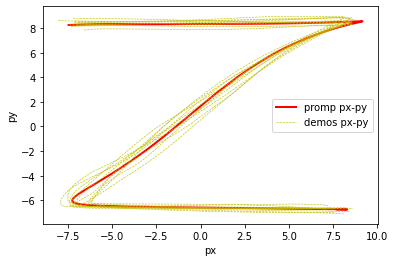

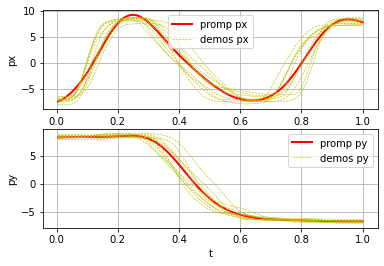

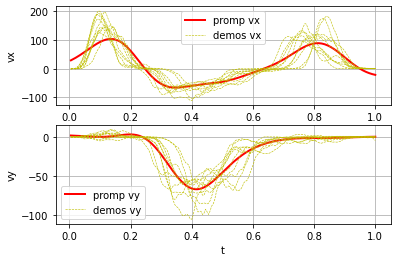

In [3]:
import string
for i in range(0,26): 
    # LOAD THE TRAINING DATA
    chrc=string.ascii_uppercase[i]
    mat = loadmat('2Dletters/'+chrc+'.mat')
    numofdemo = 10 # number of demonstrations
    dt = 0.005 # time interval
    posveldataset = []
    for i in range(numofdemo):
        pos = mat['demos'][0, i]['pos'][0, 0]
        vel = np.gradient(pos, axis=-1) / dt #returns the gradient of the array along the last axis
        pv = np.block([[pos], [vel]]) #concatenates pos and vel values
        posveldataset.append(pv)


    # Define variables and set parameters for ProMP #    
    dim=2
    Dim = 2 * dim # both position and velocity
    leng = posveldataset[0].shape[1] # length of demonstrations
    tau_motionduration = dt * leng # motion duration
    t0 = np.linspace(dt, tau_motionduration, num=leng)
    center = np.linspace(0, 1, 10) # centers of basis functions, returns evenly spaced numbers
    numofbasis = center.shape[0] # number of basis functions
    width = 50 # width of basis functions
    lb1 = 1
    lb2 = 10
    print(leng)


    # Estimate the distribution of the trajectory parameter vector w #
    Phi = np.zeros((Dim*leng, numofbasis*dim))
    wts = np.zeros((numofdemo, numofbasis*dim))
    mu_w = np.zeros(numofbasis*dim)
    cov_w = np.zeros((numofbasis*dim, numofbasis*dim))
    for i in range(leng): # 0 to 199
        Phi[i*Dim:(i+1)*Dim, :] = BasisFunction(t0[i])
    PhiT_Phi = np.matmul(np.transpose(Phi), Phi) + lb1 * np.eye(numofbasis*dim)
    cw = np.matmul(np.linalg.pinv(PhiT_Phi), np.transpose(Phi))
    # Estimate the trajectory parameter vector w from each demonstration
    for i in range(numofdemo):
        expandedTraj = posveldataset[i].flatten(order='F')
        wts[i, :] = np.matmul(cw, expandedTraj)
    # Calculate the mean and covariance of w
    mu_w = np.mean(wts, axis=0)
    cov_w = np.matmul(np.transpose(wts - mu_w), wts - mu_w) / numofdemo + lb2 * np.eye(numofbasis*dim)


    # Prediction using probabilistic movement primitives #
    pred_pv = np.zeros((Dim, leng))
    for i in range(leng):
        pred_pv[:, i] = np.matmul(BasisFunction(t0[i]), mu_w)

    # Plot predicted trajectories #
    plt.plot(pred_pv[0], pred_pv[1], 'r', label='promp px-py', linewidth=2)
    for i in range(numofdemo):
        if i == 0:
            plt.plot(posveldataset[i][0], posveldataset[i][1], 'y--', linewidth=0.6, label='demos px-py')
        else:
            plt.plot(posveldataset[i][0], posveldataset[i][1], 'y--', linewidth=0.6)
    plt.xlabel("px")
    plt.ylabel("py")
    plt.legend()
    plt.show()

    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(t0, pred_pv[0], 'r', label='promp px', linewidth=2)
    for i in range(numofdemo):
        if i == 0:
            ax1.plot(t0, posveldataset[i][0], 'y--', linewidth=0.6, label='demos px')
        else:
            ax1.plot(t0, posveldataset[i][0], 'y--', linewidth=0.6)
    ax1.set_ylabel("px")
    plt.legend()
    ax1.grid()
    ax2 = plt.subplot(2, 1, 2)
    ax2.plot(t0, pred_pv[1], 'r', label='promp py', linewidth=2)
    for i in range(numofdemo):
        if i == 0:
            ax2.plot(t0, posveldataset[i][1], 'y--', linewidth=0.6, label='demos py')
        else:
            ax2.plot(t0, posveldataset[i][1], 'y--', linewidth=0.6)
    ax2.set_ylabel("py")
    ax2.set_xlabel("t")
    plt.legend()
    ax2.grid()
    plt.show()

    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(t0, pred_pv[2], 'r', label='promp vx', linewidth=2)
    for i in range(numofdemo):
        if i == 0:
            ax1.plot(t0, posveldataset[i][2], 'y--', linewidth=0.6, label='demos vx')
        else:
            ax1.plot(t0, posveldataset[i][2], 'y--', linewidth=0.6)
    ax1.set_ylabel("vx")
    plt.legend()
    ax1.grid()
    ax2 = plt.subplot(2, 1, 2)
    ax2.plot(t0, pred_pv[3], 'r', label='promp vy', linewidth=2)
    for i in range(numofdemo):
        if i == 0:
            ax2.plot(t0, posveldataset[i][3], 'y--', linewidth=0.6, label='demos vy')
        else:
            ax2.plot(t0, posveldataset[i][3], 'y--', linewidth=0.6)
    ax2.set_ylabel("vy")
    ax2.set_xlabel("t")
    plt.legend()
    ax2.grid()
    plt.show()

# PROBABILISTIC MOVEMENT PRIMITIVES - Adaptation

## Define the update function for trajectory parameters

In [4]:
def updatedistribution(t, desPoint, noisevar, mu_w, cov_w):
    Phi=BasisFunction(t)
    pred_pv = np.matmul(Phi,mu_w)
    sigma_Phi=np.matmul(cov_w, np.transpose(Phi))
    invL = np.linalg.pinv(np.matmul(Phi, sigma_Phi) + noisevar)
    sigma_Phi_invL = np.matmul(sigma_Phi, invL)
    mu_w_new = mu_w + np.matmul(sigma_Phi_invL, desPoint-pred_pv)
    cov_w_new = cov_w - np.matmul(sigma_Phi_invL, np.transpose(sigma_Phi))
    return mu_w_new, cov_w_new


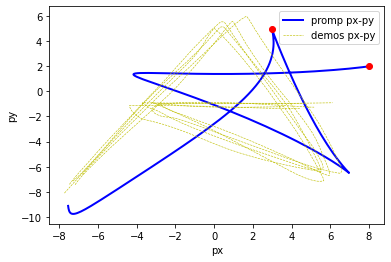

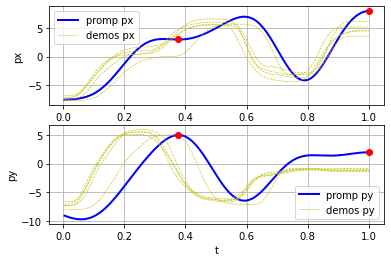

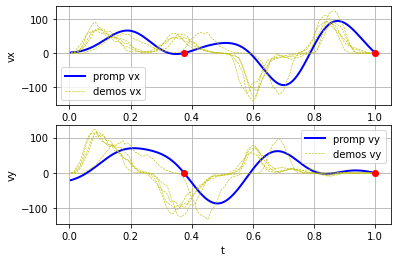

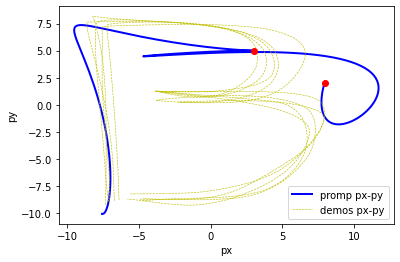

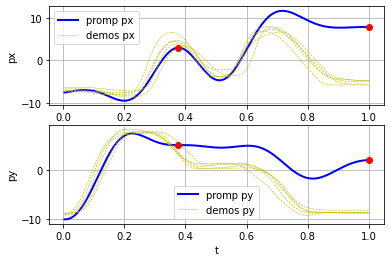

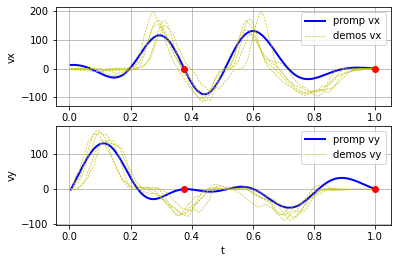

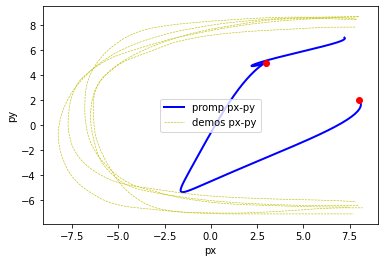

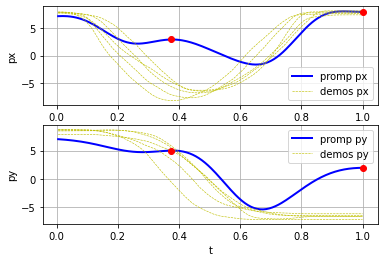

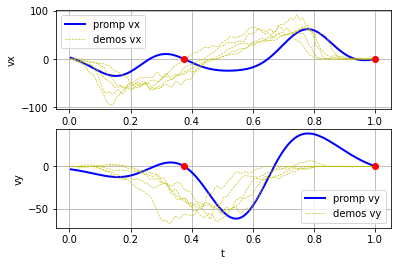

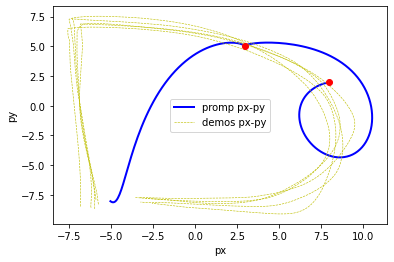

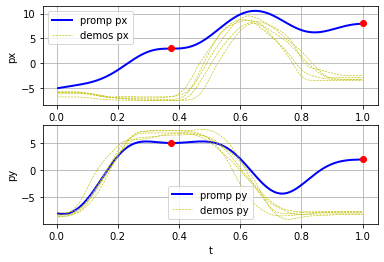

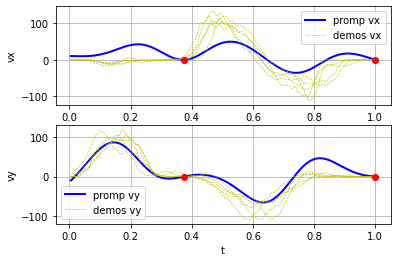

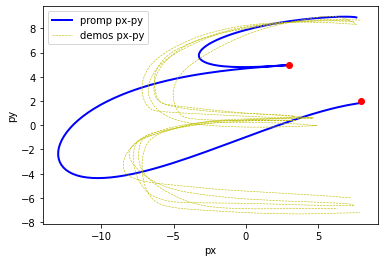

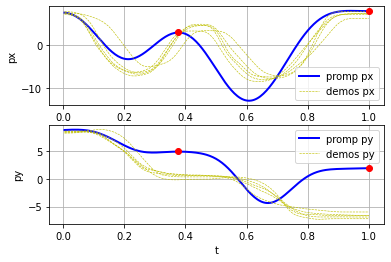

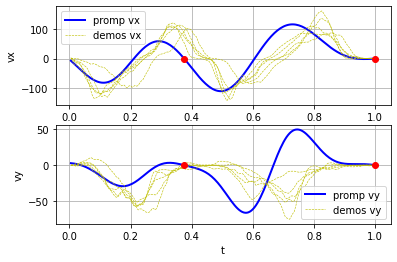

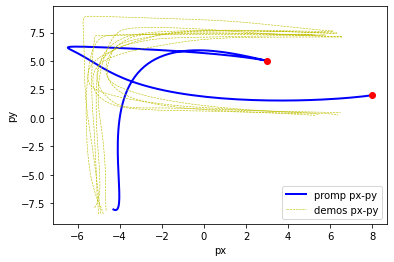

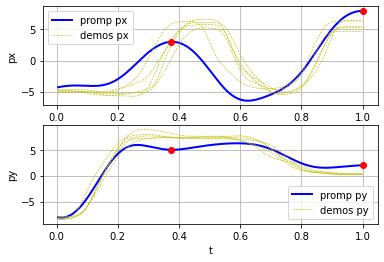

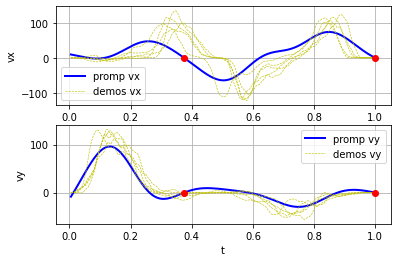

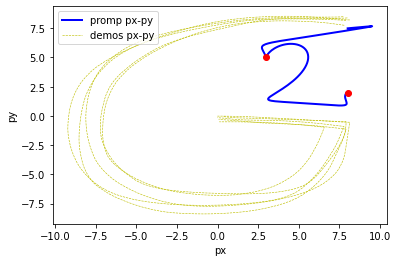

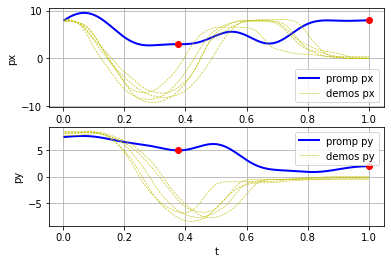

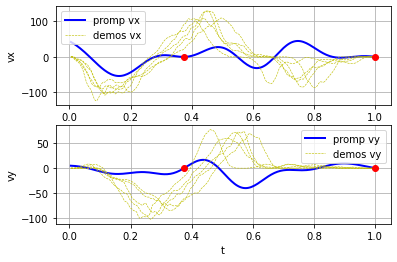

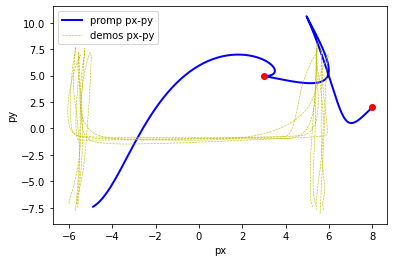

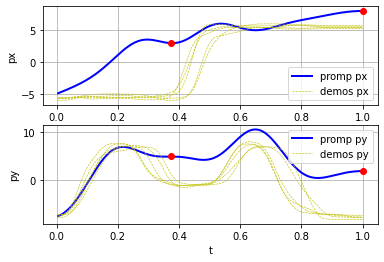

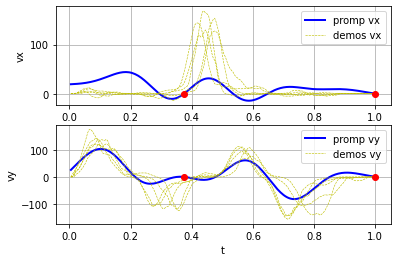

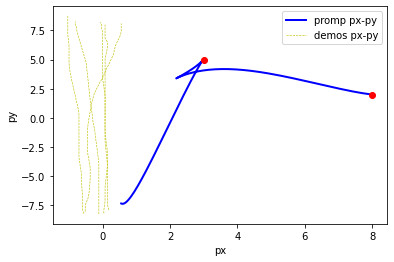

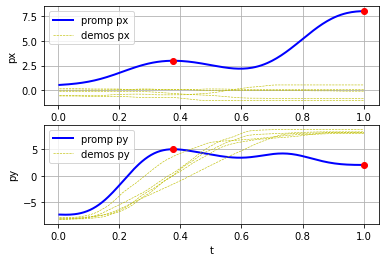

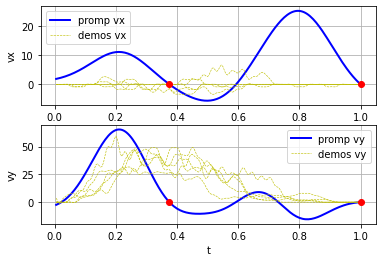

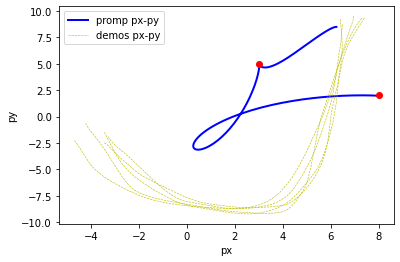

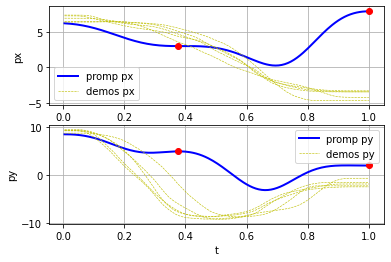

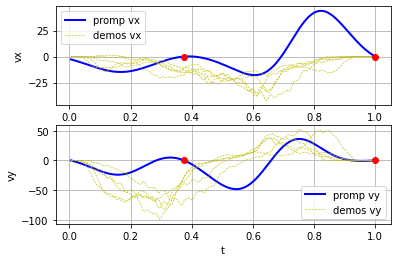

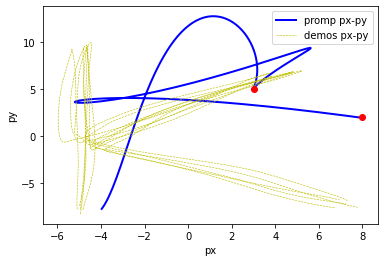

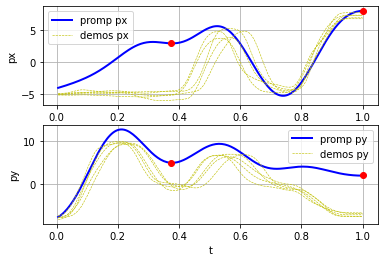

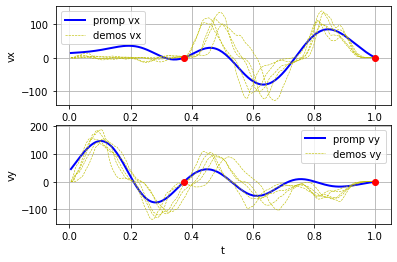

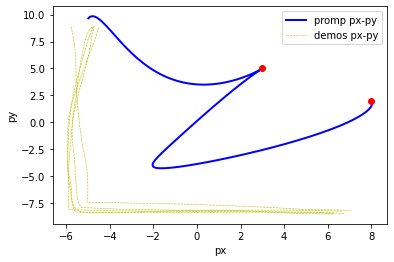

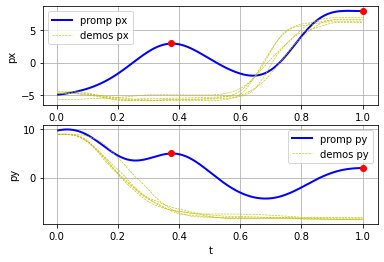

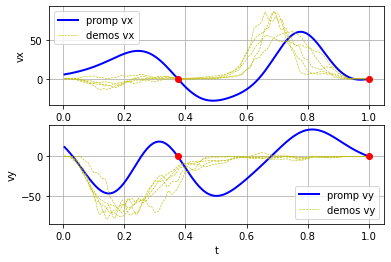

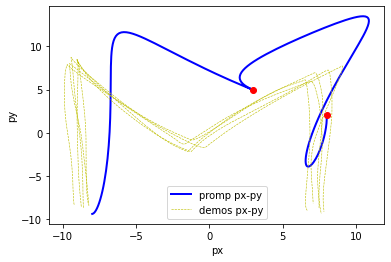

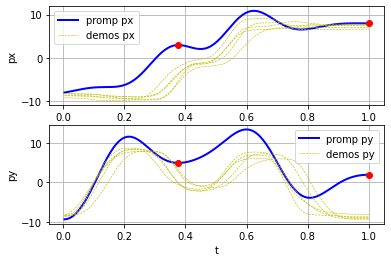

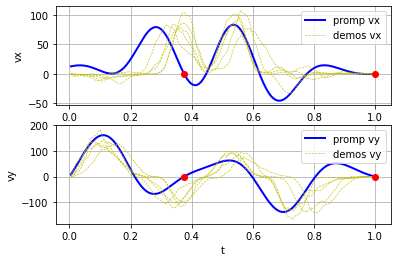

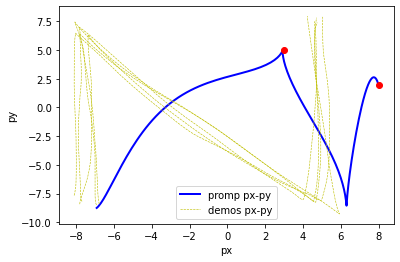

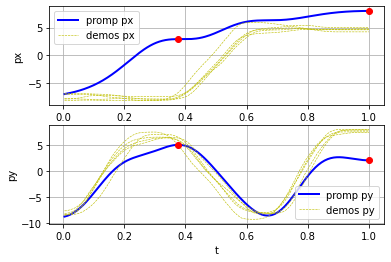

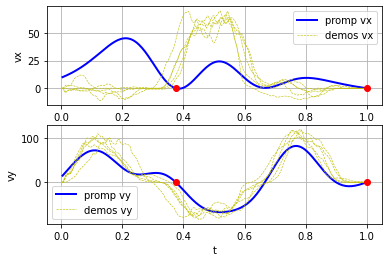

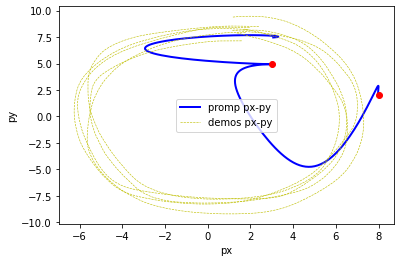

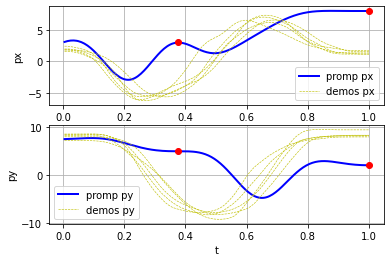

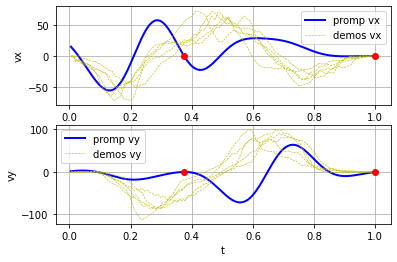

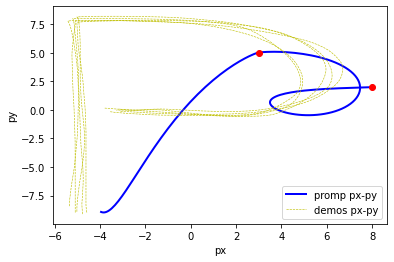

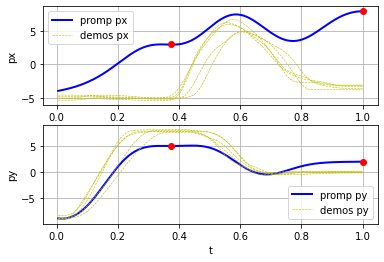

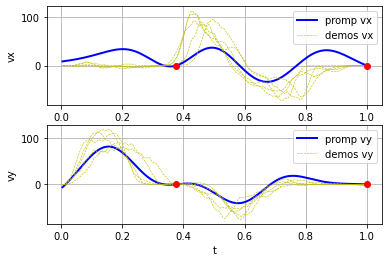

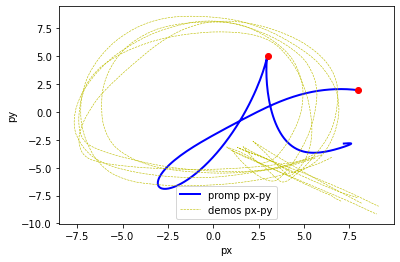

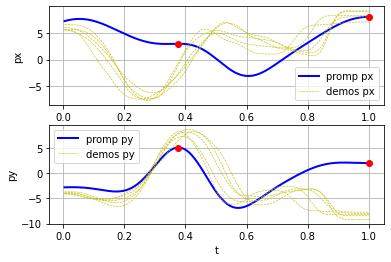

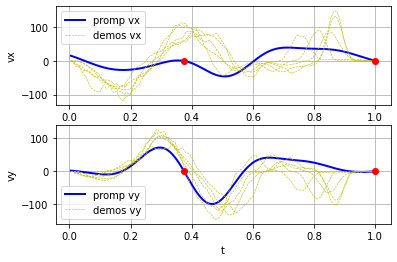

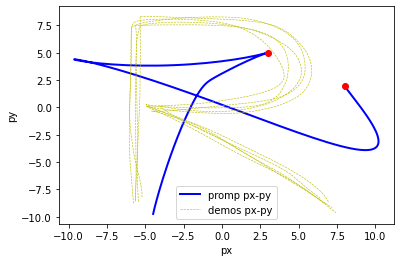

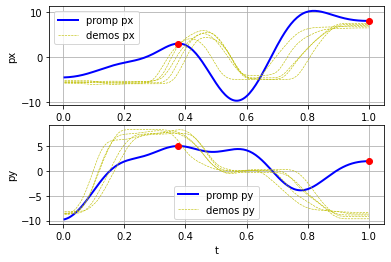

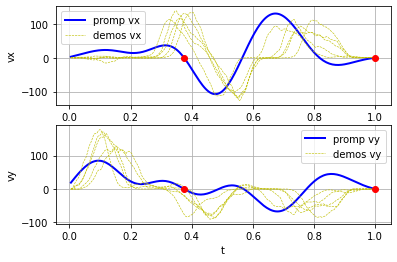

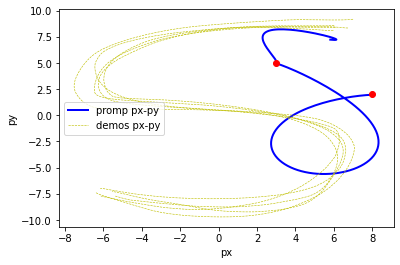

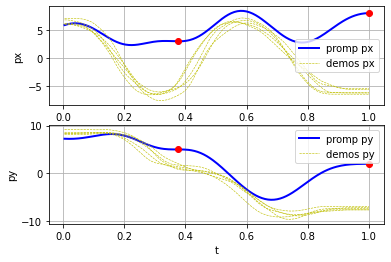

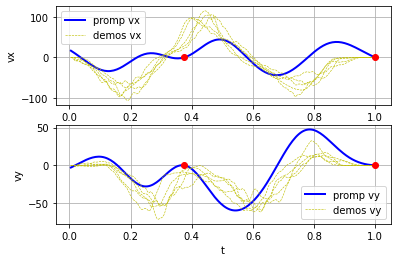

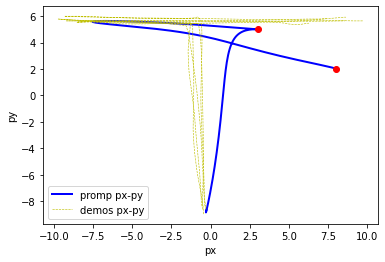

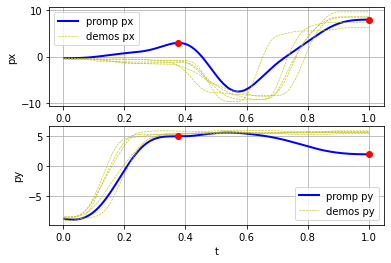

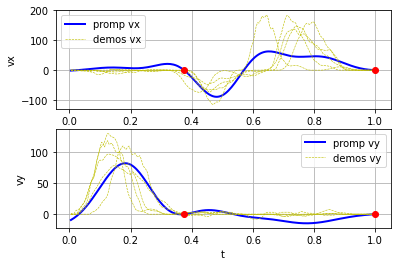

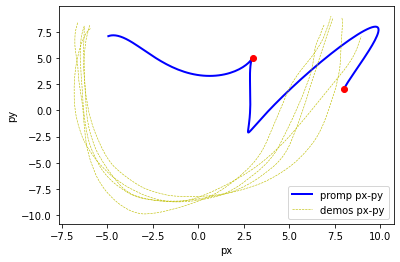

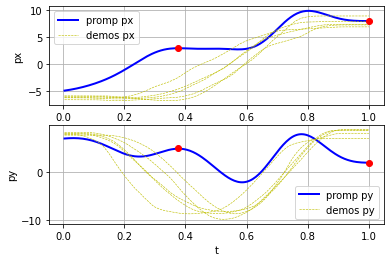

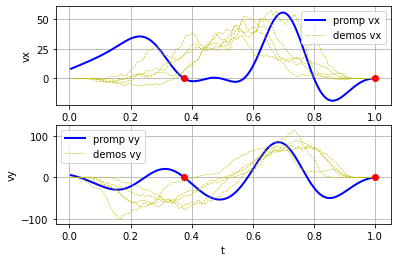

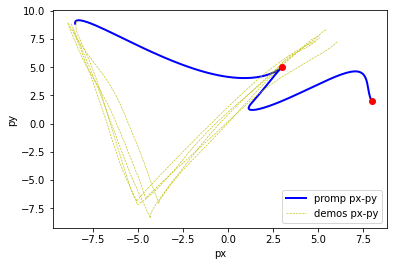

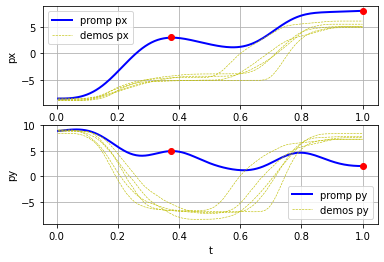

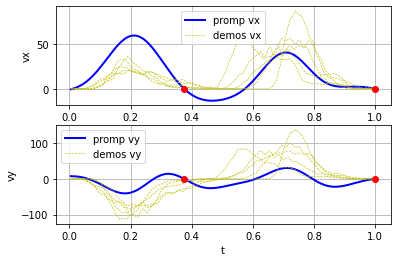

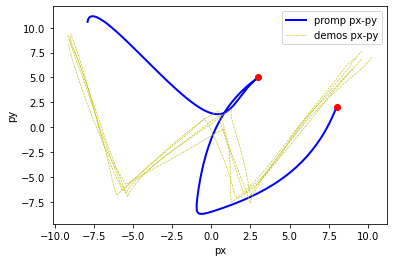

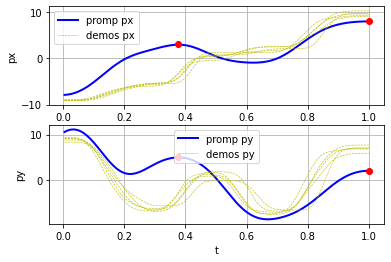

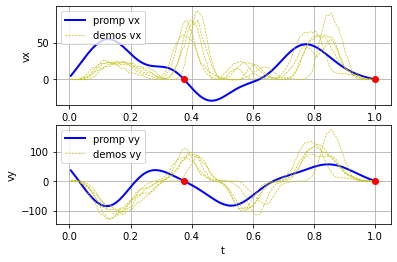

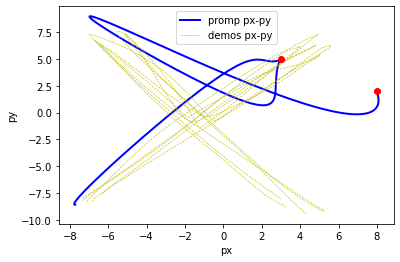

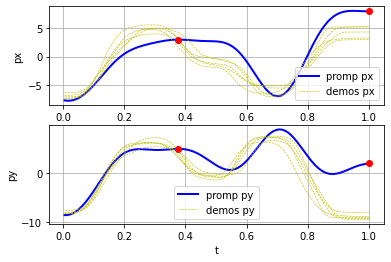

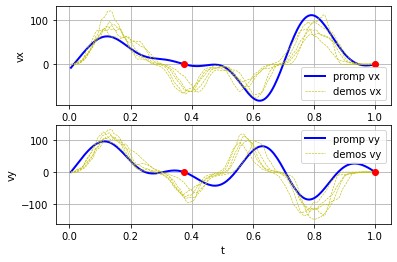

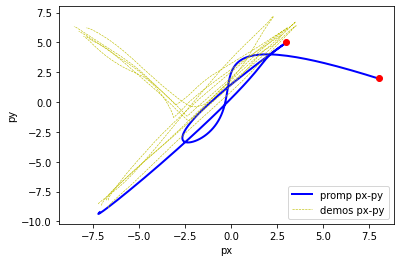

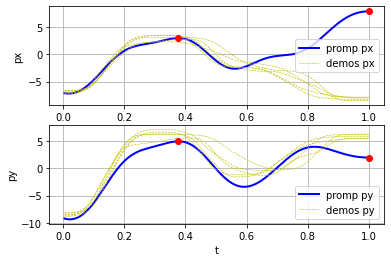

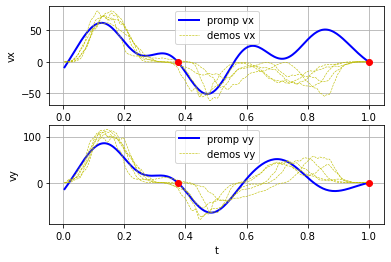

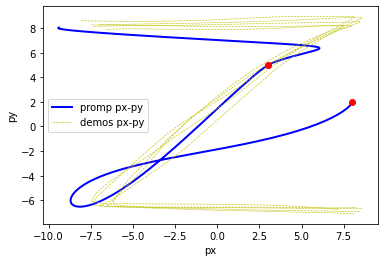

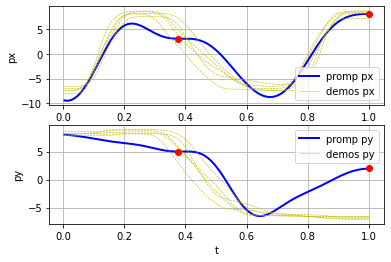

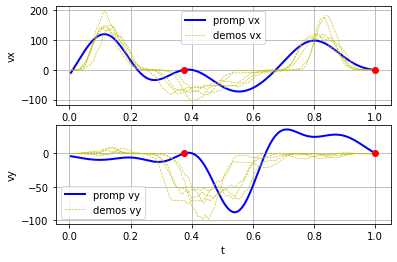

In [5]:
for i in range(0,26):
    # Load the training data
    ch=string.ascii_uppercase[i]
    mat = loadmat('2Dletters/'+ch+'.mat')
    numofdemo = 5 # number of demonstrations
    dt = 0.005 # time interval
    posveldataset = []
    for i in range(numofdemo):
        pos = mat['demos'][0, i]['pos'][0, 0]
        vel = np.gradient(pos, axis=-1) / dt
        pv = np.block([[pos], [vel]])
        posveldataset.append(pv)

    # Set parameters for ProMP
    dim = 2  # 2D trajectory
    Dim = 2 * dim # both position and velocity
    leng = posveldataset[0].shape[1] # length of demonstrations
    tau_motionduration = dt * leng # motion duration
    t0 = np.linspace(dt, tau_motionduration, num=leng)
    center = np.linspace(0, 1, 20) # centers of basis functions
    numofbasis = center.shape[0]  # number of basis functions
    width = 50 # width of basis functions
    lb1 = 1
    lb2 = 10

    
    # Estimate the distribution of the trajectory parameter vector w
    Phi = np.zeros((Dim*leng, numofbasis*dim))
    wts = np.zeros((numofdemo, numofbasis*dim))
    mu_w = np.zeros(numofbasis*dim)
    cov_w = np.zeros((numofbasis*dim, numofbasis*dim))

    for i in range(leng):
        Phi[i*Dim:(i+1)*Dim, :] = BasisFunction(t0[i])
    PhiT_Phi = np.matmul(np.transpose(Phi), Phi) + lb1 * np.eye(numofbasis*dim)
    cw = np.matmul(np.linalg.pinv(PhiT_Phi), np.transpose(Phi))

    # Estimate the trajectory parameter vector w from each demonstration
    for i in range(numofdemo):
        trajectories_ext = posveldataset[i].flatten(order='F') # concatenate all columns into a column vector
        wts[i, :] = np.matmul(cw, trajectories_ext)

    # Calculate the mean and covariance of w
    mu_w = np.mean(wts, axis=0)
    cov_w = np.matmul(np.transpose(wts - mu_w), wts - mu_w) / numofdemo + lb2 * np.eye(numofbasis*dim)


    # Define desired points and modulate w
    via_time1 = 3.0/8
    via_point1 = np.array([3, 5, 0, 0]) # first desired point, format:[2D pos, 2D vel]
    via_time2 = 1.0
    via_point2 = np.array([8, 2, 0, 0]) # second desired point, format:[2D pos, 2D vel]

    via_var = 0.01 * np.eye(Dim) # inversely proportional to the adaptation precision
    

    # Update the distribution of w using each desired point
    [mu_w_new, cov_w_new] = updatedistribution(via_time1, via_point1, via_var, mu_w, cov_w)
    [mu_w_new, cov_w_new] = updatedistribution(via_time2, via_point2, via_var, mu_w_new, cov_w_new)

    # Prediction using ProMP
    pred_pv = np.zeros((Dim, leng))
    for i in range(leng):
        pred_pv[:, i] = np.matmul(BasisFunction(t0[i]), mu_w_new)

    # Plot predicted trajectories
    plt.plot(pred_pv[0], pred_pv[1], 'b', label='promp px-py', linewidth=2)
    for i in range(numofdemo):
        if i == 0:
            plt.plot(posveldataset[i][0], posveldataset[i][1], 'y--', linewidth=0.6, label='demos px-py')
        else:
            plt.plot(posveldataset[i][0], posveldataset[i][1], 'y--', linewidth=0.6)
    plt.plot(via_point1[0], via_point1[1], 'ro')
    plt.plot(via_point2[0], via_point2[1], 'ro')
    plt.xlabel("px")
    plt.ylabel("py")
    plt.legend()
    plt.show()

    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(t0, pred_pv[0], 'b', label='promp px', linewidth=2)
    for i in range(numofdemo):
        if i == 0:
            ax1.plot(t0, posveldataset[i][0], 'y--', linewidth=0.6, label='demos px')
        else:
            ax1.plot(t0, posveldataset[i][0], 'y--', linewidth=0.6)
    plt.plot(via_time1, via_point1[0], 'ro')
    plt.plot(via_time2, via_point2[0], 'ro')
    ax1.set_ylabel("px")
    plt.legend()
    ax1.grid()
    ax2 = plt.subplot(2, 1, 2)
    ax2.plot(t0, pred_pv[1], 'b', label='promp py', linewidth=2)
    for i in range(numofdemo):
        if i == 0:
            ax2.plot(t0, posveldataset[i][1], 'y--', linewidth=0.6, label='demos py')
        else:
            ax2.plot(t0, posveldataset[i][1], 'y--', linewidth=0.6)
    plt.plot(via_time1, via_point1[1], 'ro')
    plt.plot(via_time2, via_point2[1], 'ro')
    ax2.set_ylabel("py")
    ax2.set_xlabel("t")
    plt.legend()
    ax2.grid()
    plt.show()

    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(t0, pred_pv[2], 'b', label='promp vx', linewidth=2)
    for i in range(numofdemo):
        if i == 0:
            ax1.plot(t0, posveldataset[i][2], 'y--', linewidth=0.6, label='demos vx')
        else:
            ax1.plot(t0, posveldataset[i][2], 'y--', linewidth=0.6)
    plt.plot(via_time1, via_point1[2], 'ro')
    plt.plot(via_time2, via_point2[2], 'ro')
    ax1.set_ylabel("vx")
    plt.legend()
    ax1.grid()
    ax2 = plt.subplot(2, 1, 2)
    ax2.plot(t0, pred_pv[3], 'b', label='promp vy', linewidth=2)
    for i in range(numofdemo):
        if i == 0:
            ax2.plot(t0, posveldataset[i][3], 'y--', linewidth=0.6, label='demos vy')
        else:
            ax2.plot(t0, posveldataset[i][3], 'y--', linewidth=0.6)
    plt.plot(via_time1, via_point1[3], 'ro')
    plt.plot(via_time2, via_point2[3], 'ro')
    ax2.set_ylabel("vy")
    ax2.set_xlabel("t")
    plt.legend()
    ax2.grid()
    plt.show()